In [1]:
# Standard library imports
import os
import math

# Third-party imports for data handling and visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TensorFlow and Keras imports for deep learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16


In [21]:
# # Preparing the Dataset from zip file

# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

# base_dir = '/tmp/cats_and_dogs_filtered'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [22]:

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

In [2]:

base_dir = '/Users/arahjou/Downloads/U_NET_GI_Segmentation/data/dataset_model'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Training class directories
train_class_I_dir = os.path.join(train_dir, 'class_I')
train_class_II_dir = os.path.join(train_dir, 'class_II')
train_class_III_dir = os.path.join(train_dir, 'class_III')

# Validation class directories
validation_class_I_dir = os.path.join(validation_dir, 'class_I')
validation_class_II_dir = os.path.join(validation_dir, 'class_II')
validation_class_III_dir = os.path.join(validation_dir, 'class_III')

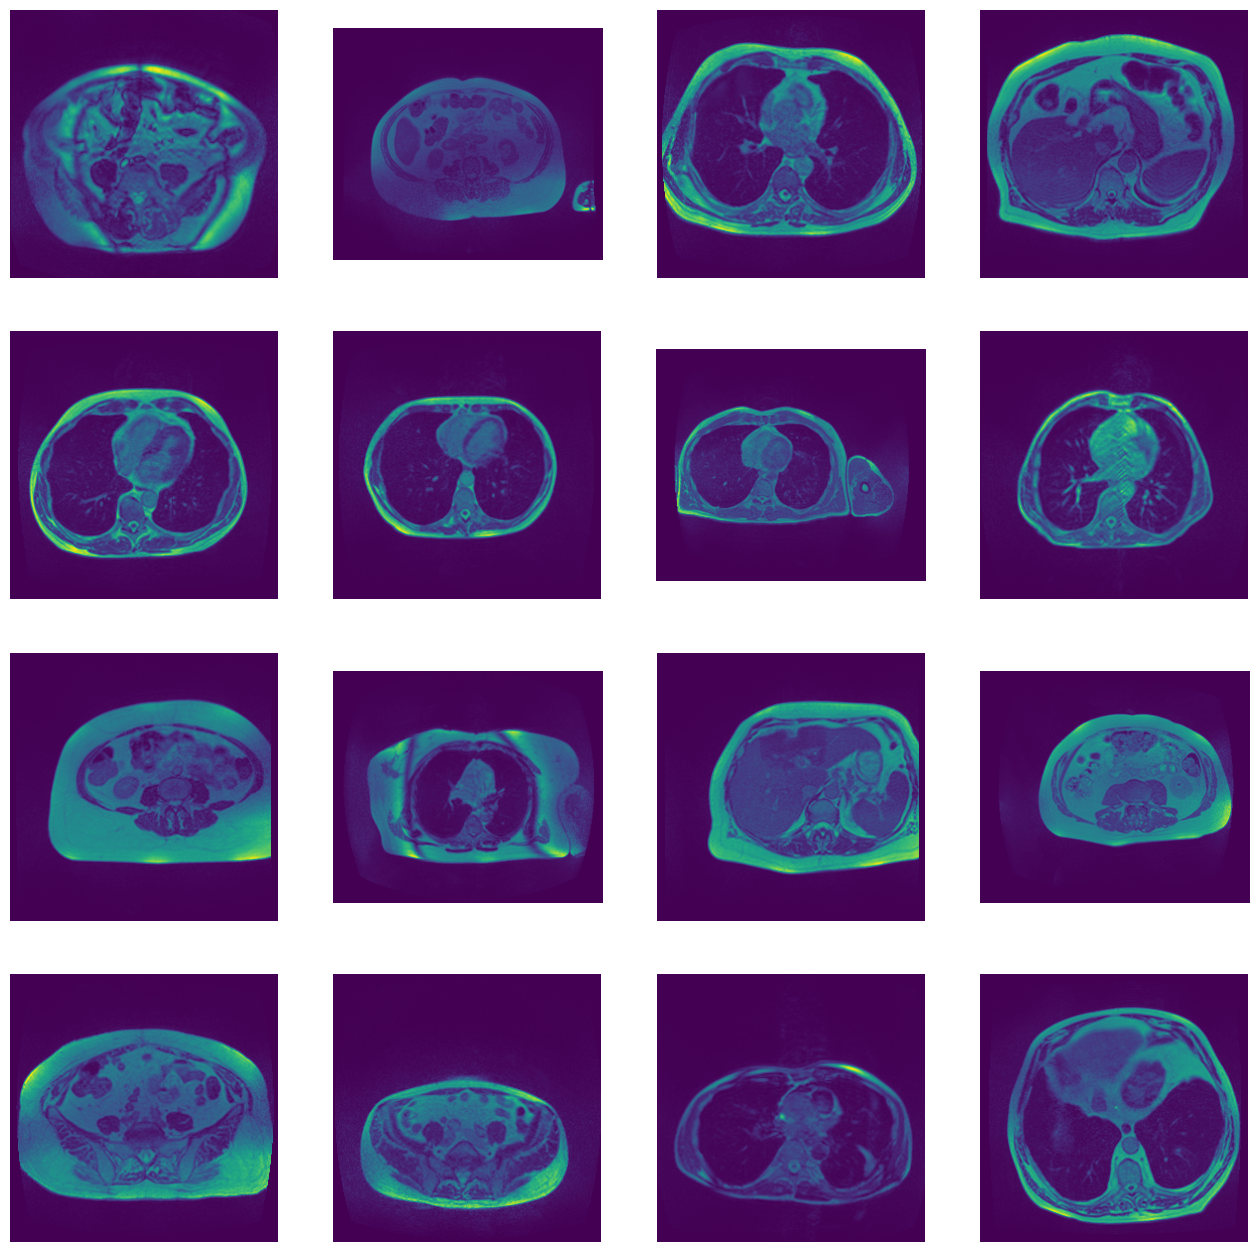

In [3]:
# Set up the plot grid
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 100  # This index needs to be checked based on the number of images

# Fetch file names
train_class_I_fnames = os.listdir(train_class_I_dir)
train_class_II_fnames = os.listdir(train_class_II_dir)
train_class_III_fnames = os.listdir(train_class_III_dir)

# Adjust pic_index based on available images to avoid indexing issues
max_images = min(len(train_class_I_fnames), len(train_class_II_fnames), len(train_class_III_fnames), pic_index)

# Select images for display
next_class_I_pix = [os.path.join(train_class_I_dir, fname) for fname in train_class_I_fnames[max_images-8:max_images]]
next_class_II_pix = [os.path.join(train_class_II_dir, fname) for fname in train_class_II_fnames[max_images-8:max_images]]
next_class_III_pix = [os.path.join(train_class_III_dir, fname) for fname in train_class_III_fnames[max_images-8:max_images]]

# Combine and ensure the list does not exceed the maximum number of subplots
total_images = next_class_I_pix + next_class_II_pix + next_class_III_pix
total_images = total_images[:nrows*ncols]  # Limit to the number of subplots

# Display images
for i, img_path in enumerate(total_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes or gridlines
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


## Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)  

![Architecture of VGG-16](/Users/arahjou/Downloads/U_NET_GI_Segmentation/images/vgg16-neural-network.jpg)

![Layout of the VGG-16 model](/Users/arahjou/Downloads/U_NET_GI_Segmentation/images/VGG-2.webp)

In [4]:
# Calculate steps per epoch for training and validation
num_train_samples = sum(len(os.listdir(directory)) for directory in [train_class_I_dir, train_class_II_dir, train_class_III_dir])
num_val_samples = sum(len(os.listdir(directory)) for directory in [validation_class_I_dir, validation_class_II_dir, validation_class_III_dir])
batch_size = 20
steps_per_epoch = math.ceil(num_train_samples / batch_size)
validation_steps = math.ceil(num_val_samples / batch_size)

In [5]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
# Image normalization for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [7]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    class_mode='binary',
    target_size=(224, 224),
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    class_mode='binary',
    target_size=(224, 224),
    shuffle=False
)

Found 32719 images belonging to 3 classes.
Found 5775 images belonging to 3 classes.


In [8]:
steps_per_epoch = math.ceil(num_train_samples / batch_size)  # Using the correct batch size here
validation_steps = math.ceil(num_val_samples / batch_size)  # Using the correct batch size here

In [9]:

# Load VGG16 base model
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

2024-05-08 21:33:49.823788: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-08 21:33:49.823832: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-08 21:33:49.823845: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-08 21:33:49.823874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-08 21:33:49.823894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
# Building the model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [11]:
try:
    vgghist = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        epochs=100
    )
except Exception as e:
    print("Error during model training:", e)
    print("Detailed error traceback:")
    import traceback
    traceback.print_exc()

Epoch 1/100


2024-05-08 21:34:26.629513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/arahjou/Documents/Com_Conda/.conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1636/1636 ━━━━━━━━━━━━━━━━━━━━ 308s 187ms/step - acc: 0.4229 - loss: 0.5714 - val_acc: 0.4298 - val_loss: 0.4567
Epoch 2/100
Error during model training: 'NoneType' object has no attribute 'items'
Detailed error traceback:


2024-05-08 21:39:34.892688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 21:39:34.892702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_1_1/dropout_1/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_20]]
2024-05-08 21:39:34.892762: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1039115183646107919
2024-05-08 21:39:34.892773: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10113780627830586391
2024-05-08 21:39:34.892777: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10322482914024724986
2024-05-08 21:39:34.892804: I tensorflow/core/framew

In [35]:
# Plotting the training and validation accuracy and loss
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

NameError: name 'vgghist' is not defined